In [1]:
import warnings
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Schidu01\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

In [3]:
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [4]:
y = co2['co2'].resample('MS').mean()

In [6]:
y.isnull().sum()

5

In [7]:
y = y.fillna(y.bfill())

In [8]:
y.isnull().sum()

0

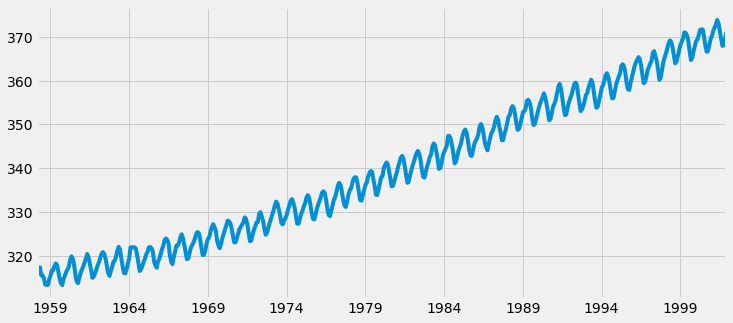

In [9]:
y.plot(figsize=(11,5))
plt.show()

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

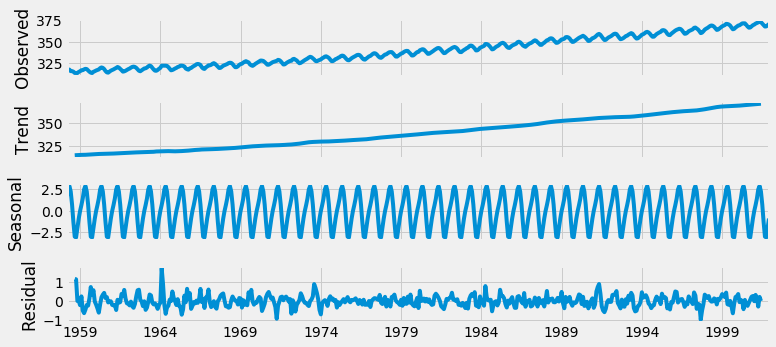

In [11]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [14]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [16]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[4], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)


In [18]:
warnings.filterwarnings("ignore")

In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624043257
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727638858
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320021
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878545588537
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.65789780726
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912955827
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754598261
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327394357
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067304665
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716865425
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1105.710323856536
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4315876419755
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893641971
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.091298905328
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194103
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385497181556
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.950175782907
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.928375962471
ARIMA

In [21]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)

In [22]:
result = mod.fit()

In [23]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -133.890
Date:                            Tue, 18 Sep 2018   AIC                            277.780
Time:                                    23:15:42   BIC                            299.107
Sample:                                03-01-1958   HQIC                           286.130
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077   

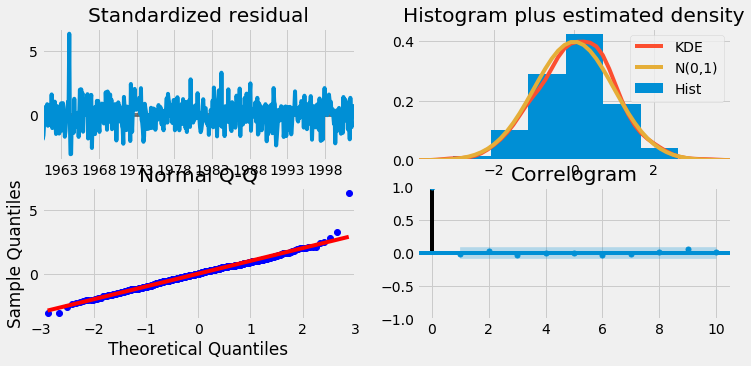

In [25]:
results.plot_diagnostics()
plt.show()

In [31]:
pred = result.get_prediction(start=pd.to_datetime('1999-01-01'),dynamic=False)
pred_ci = pred.conf_int()

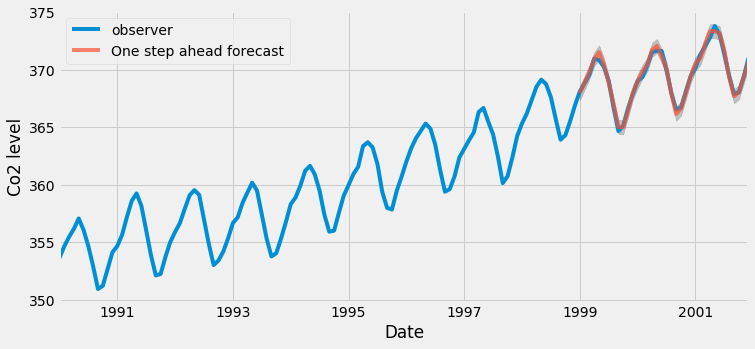

In [32]:
ax = y['1990':].plot(label='observer')
pred.predicted_mean.plot(ax=ax, label='One step ahead forecast', alpha=0.7)

ax.fill_between(pred_ci.index,pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set(xlabel='Date')
ax.set(ylabel='Co2 level')
plt.legend()

plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

mse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [46]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred.conf_int()


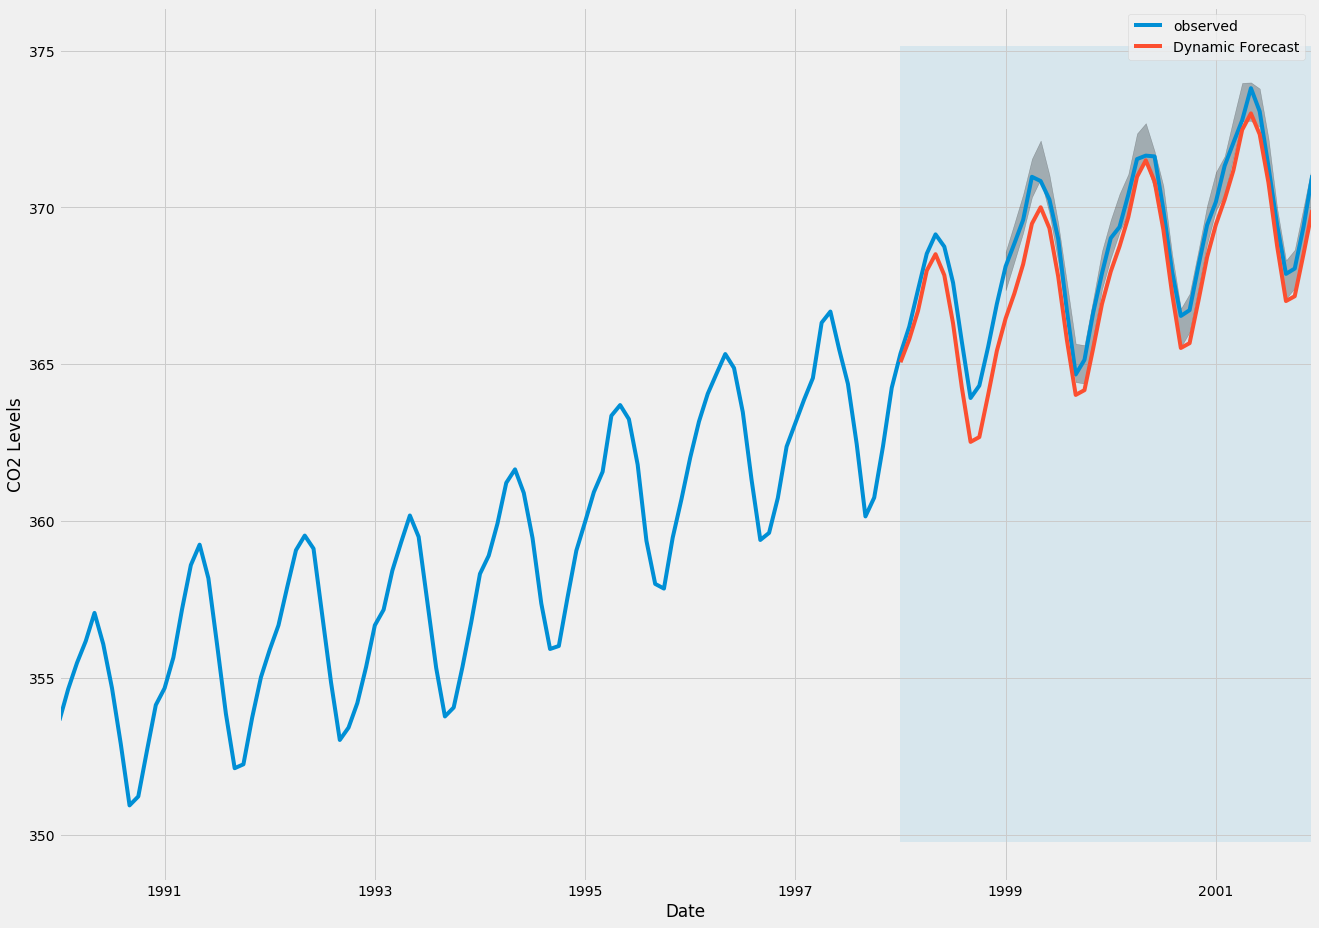

In [47]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [48]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [49]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

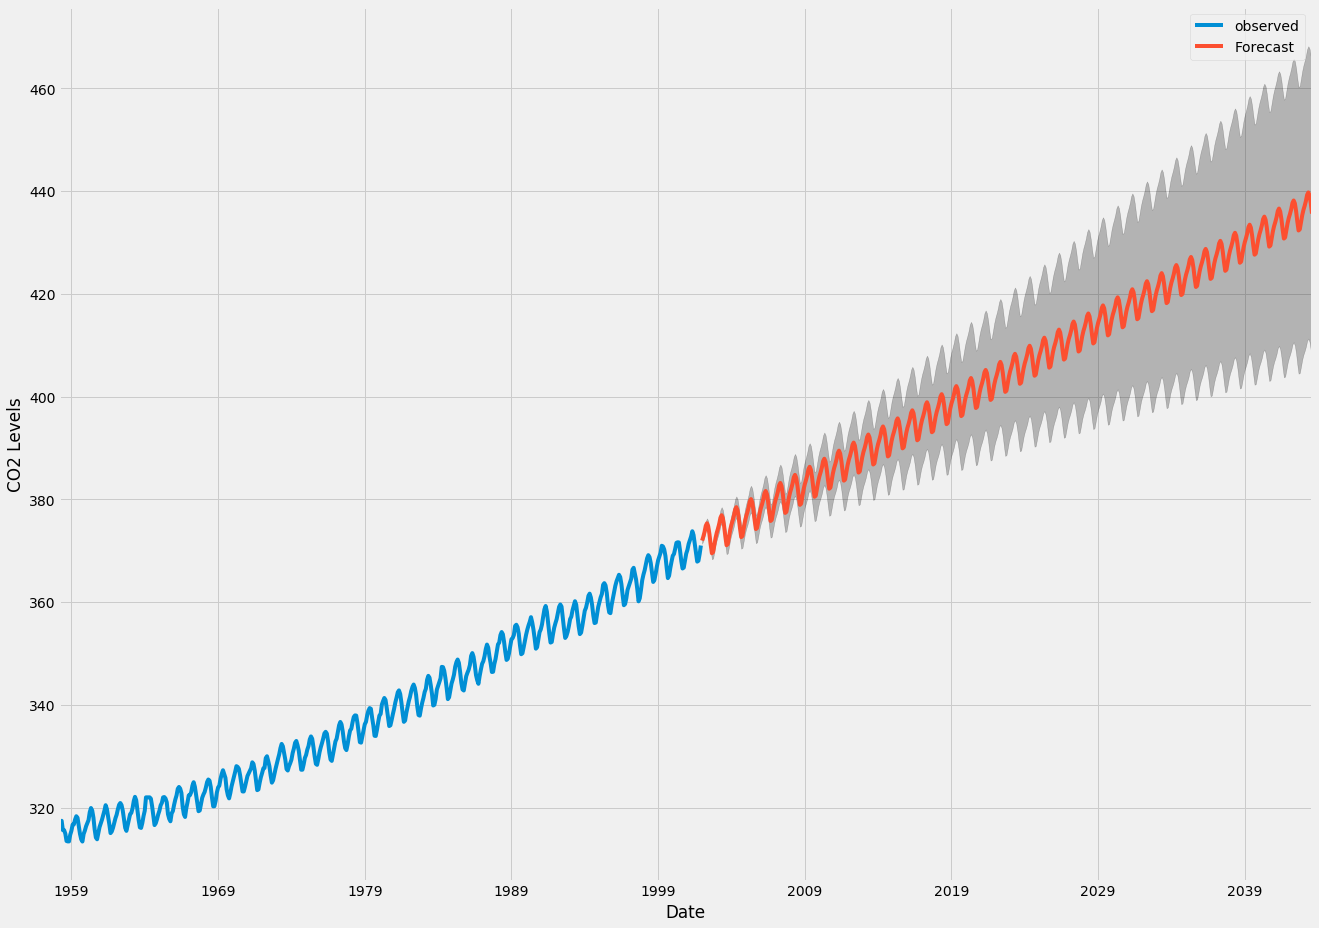

In [50]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()
